# SULO Pizza Tutorial - Qualities and Quantities
This part of the tutorial focuses on the qualities and quantitative measurement values related to the spiciness of a pizza.  Our goal is to define some qualities and quantities, and to use them to characterize certain kinds of pizzas, and to use them in defined class expressions to discover those pizzas that satisfy the stated requirements.

In [1]:
from lib.helpers import *
sulo = get_ontology("https://w3id.org/sulo/sulo.owl").load()  # RDF/XML
pizza = get_ontology("pizza.owl").load()
pizza.imported_ontologies.append(sulo)

In SULO, the **spiciness** of a pizza is a kind of **Quality**. Unlike a **Spatial Object**, a **Quality** can't exist on its own - it specifically depends on the existance of another entity.  **Qualities** are intrinsic characteristics - they are a **Feature** of an entity, whose value can change with time.

We can further distinguish different levels or categories of **Spiciness** such as **Hot Spicy**, **Medium Spicy**, **Mild Spicy**. These would be represented as subclasses to **Spiciness**. 

In [2]:
with pizza:
    class Spicyness (sulo.Quality):
        pass
    class SpicyHot(Spicyness):
        pass
    class SpicyMild(Spicyness):
        pass
    class SpicyMedium(Spicyness):
        pass
    
    AllDisjoint([SpicyHot,SpicyMedium,SpicyMild])

We can use these classes to define a new type of pizza, that of a **Spicy Salami Pizza**, which is a **Pizza** composed of **Pizza Sauce** and **Spicy Salami**. We an also create a defined class of a **Spicy Pizza**, which is fully defined as a Pizza that has a part with the quality of hot or medium spiciness.


In [3]:
with pizza:
    
    class SpicySalami(pizza.FoodMaterial):
        is_a = [sulo.hasFeature.some(pizza.SpicyHot or pizza.SpicyMedium)]
            
    class SpicySalamiPizza(pizza.Pizza):
        equivalent_to = [pizza.Pizza &
                            sulo.hasDirectPart.exactly(1, pizza.PizzaSauce) &
                            sulo.hasDirectPart.exactly(1,pizza.SpicySalami) &
                            sulo.hasDirectPart.only(pizza.SpicySalami or pizza.PizzaSauce) ]
        
    class SpicyPizza(pizza.Pizza):
        equivalent_to = [pizza.Pizza & sulo.hasDirectPart.some(sulo.hasFeature.some(pizza.SpicyHot or pizza.SpicyMedium))]
    

Let's check to see if the **SpicySalamiPizza** is inferred as a type of **SpicyPizza**.

In [4]:
in_ancestors(pizza, SpicySalamiPizza, SpicyPizza)

SpicySalamiPizza is a subclass of SpicyPizza


The sensation of spiciness or pungency is caused by chemical compounds—most notably capsaicinoids. These activate pain and heat receptors in the mouth and skin. The amount of capsaicinoids, measured in parts per million (ppm) of capsaicinoids, is correlated with our perception of spiciness. The Scoville Heat Unit (SHU), which is approximately 16 times the  ppm of capsaicinoids, is the standard unit of measure. One of the most spicy food materials is the Ghost pepper rates over ~1,000,000 SHU.

A reasonably spicy salami would have an SHU in the range of 50,000–300,000. Let use the value of 100,000 to construct now a quantitative definition spiciness for a Spicy Salami.

In [ ]:
with pizza:
    
    class SpicynessMeasurement (sulo.Quantity):
        # we add a subclass axiom that every instance of SpicynessMeasurement refers to (is about) an instance of the quality of Spicyness
        is_a = [sulo.refersTo.some(Spicyness)]
        
    class HotPepper(pizza.FoodMaterial):
        is_a = [sulo.hasFeature.some(SpicynessMeasurement &
                                     sulo.refersTo.some(Spicyness) &
                                     sulo.hasValue.some(ConstrainedDatatype(int, min_inclusive = 500000)))
                ]        
    
    class HotPepperPizza(pizza.Pizza):
        # we define HotPepperPizza to be equivalent to any pizza that has exactly one HotPepper and one PizzaSauce as direct parts, and nothing else
        equivalent_to = [pizza.Pizza &
                            sulo.hasDirectPart.exactly(1, pizza.PizzaSauce) &
                            sulo.hasDirectPart.exactly(1, HotPepper) &
                            sulo.hasDirectPart.only(HotPepper or pizza.PizzaSauce) ]
    
    # We add a disjointness axiom stating that HotPepper and SpicySalami are disjoint classes
    AllDisjoint([HotPepper, SpicySalami])


Since a HotPepperPizza is defined solely with the ingredient of HotPepper, and a HotPepper has a numeric spicyness, there is no way to infer that a HotPepperPizza is a type of SpicyPizza.

In [6]:
in_ancestors(pizza, HotPepperPizza, SpicyPizza)

HotPepperPizza is NOT a subclass of SpicyPizza


To get the inference that a HotPepperPizza, we need to add more axioms to the ontology that either
i) indicates that SpicyHot is a quality of soemthing that is has a spicyness measurement of 300,000+ SHU
ii) a SpicyPizza is one where its ingredients have the medium hot and spicy hot quality or has a spicyness measurement of 300,000+ SHU

In [ ]:
with pizza:   
    # let's add a new axiom to SpicyPizza to say that it is equivalent to any pizza that has a part with a spicyness measurement of at least 300,000 SHU
    pizza.SpicyPizza.equivalent_to.append(pizza.Pizza & sulo.hasDirectPart.some(sulo.hasFeature.some(pizza.SpicynessMeasurement & sulo.hasValue.some(ConstrainedDatatype(int, min_inclusive = 300000)))))

In [8]:
in_ancestors(pizza, HotPepperPizza, SpicyPizza)
pizza.HotPepperPizza.ancestors()

HotPepperPizza is a subclass of SpicyPizza


{owl.Thing,
 pizza.FoodMaterial,
 pizza.HotPepperPizza,
 pizza.Pizza,
 pizza.SpicyPizza,
 sulo.Object,
 sulo.SpatialObject}

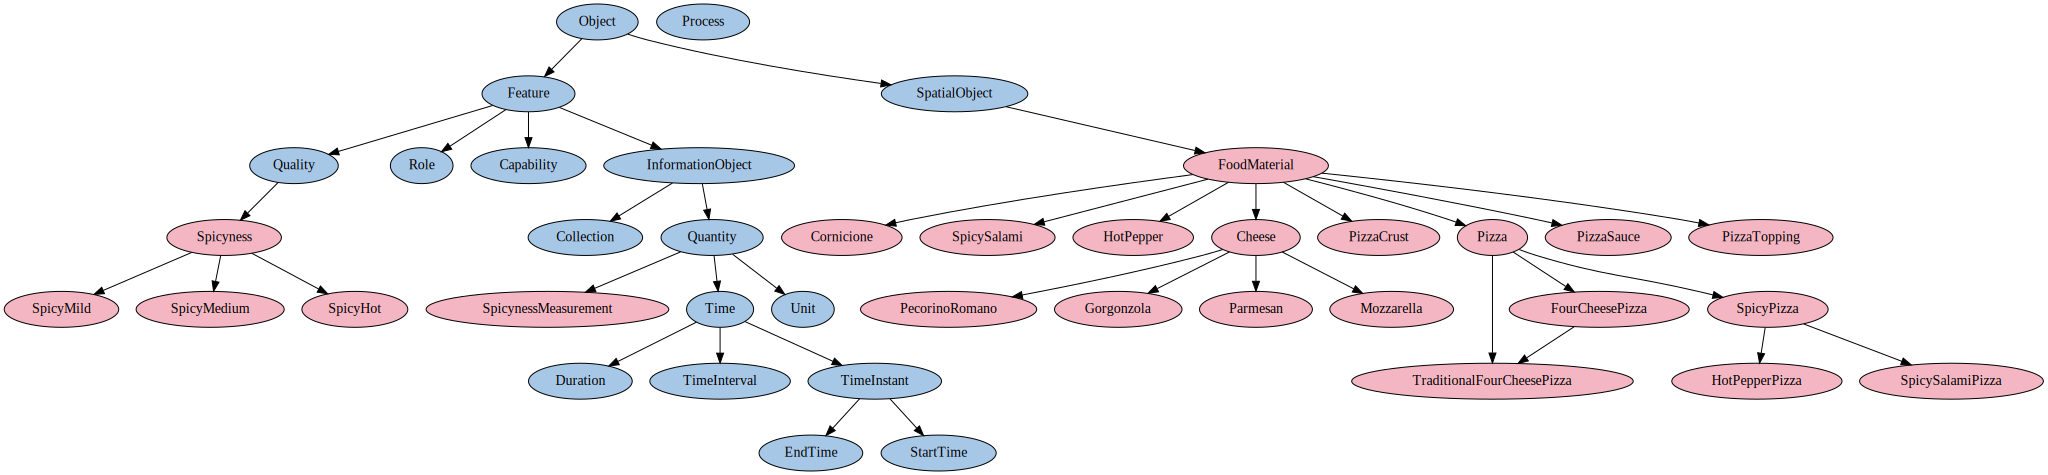

In [9]:
pizza.save(file = "pizza.owl", format = "rdfxml")
pizza.save(file = "pizza-02.owl", format = "rdfxml")
display(get_color_tree([sulo, pizza]))